![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Get the data

In [2]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
display(df.head())
df.info()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Data Cleaning

In [3]:
def col_names_std(df):
    import pandas as pd
    import numpy as np
    df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]
    return df

df=col_names_std(df)

import datetime
from datetime import date

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

# EDA

## Numerical features

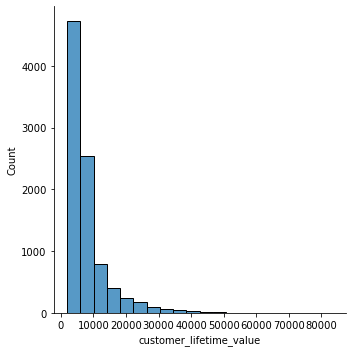

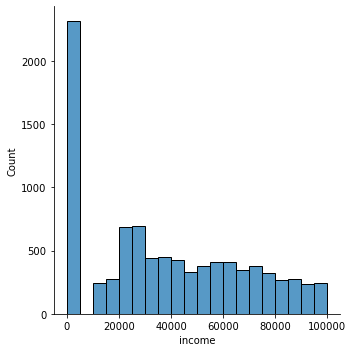

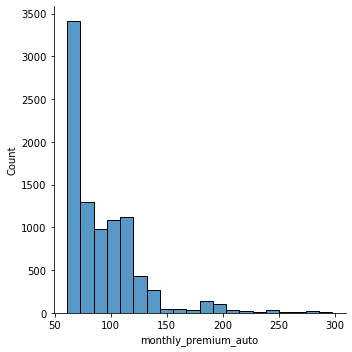

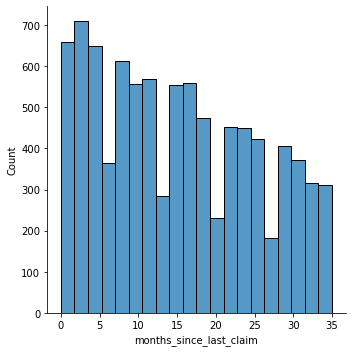

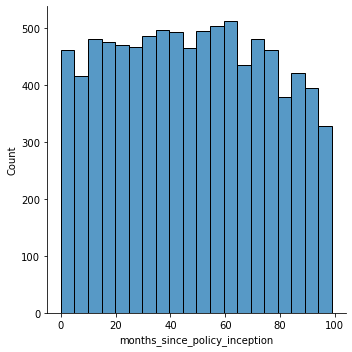

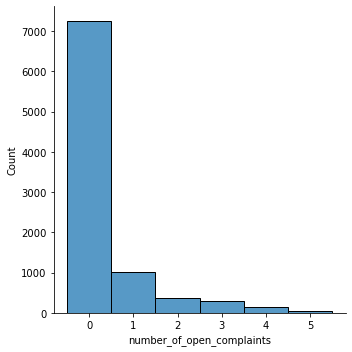

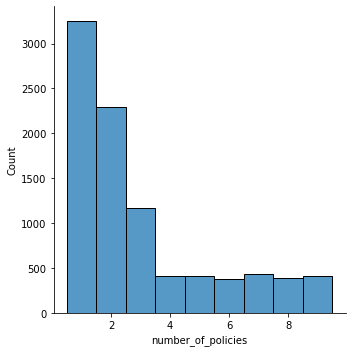

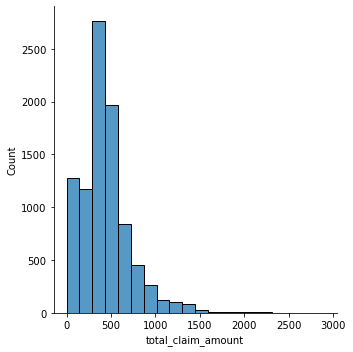

In [4]:
numerical=df.select_dtypes(include='number')#.apply(lambda x: round(x,2)) # a lambda just to round it pretty
#NOTE: I am excluding the boolean response
#display(numerical)

continuous=['customer_lifetime_value', 'income', 'monthly_premium_auto', 
            'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
discrete=['number_of_open_complaints', 'number_of_policies']

for column in numerical.columns:
    if column in continuous:
        sns.displot(numerical, x=column, bins=20)
    else:
        sns.displot(numerical, x=column, discrete=True)

### Correlation matrices

In [5]:
corr_mat = df.corr(method='spearman')
corr_mat

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.055395   
income                                        0.055395  1.000000   
monthly_premium_auto                          0.453933 -0.017608   
months_since_last_claim                       0.005126 -0.025784   
months_since_policy_inception                -0.002429 -0.001945   
number_of_open_complaints                    -0.031312  0.006334   
number_of_policies                            0.488860 -0.010273   
total_claim_amount                            0.210598 -0.401598   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.453933                 0.005126   
income                                    -0.017608                -0.025784   
monthly_premium_auto                       1.000000                -0.005989   
months_since_last_claim                   -0.005989                 1.000000   
months_since_policy_inception              0.014596                -0.048269   
number_of_open_complaints                 -0.012751                 0.005736   
number_of_policies                        -0.006936                 0.011439   
total_claim_amount                         0.522261                -0.000782   

                               months_since_policy_inception  \
customer_lifetime_value                            -0.002429   
income                                             -0.001945   
monthly_premium_auto                                0.014596   
months_since_last_claim                            -0.048269   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.013233   
number_of_policies                                 -0.009546   
total_claim_amount                                 -0.006569   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.031312            0.488860   
income                                          0.006334           -0.010273   
monthly_premium_auto                           -0.012751           -0.006936   
months_since_last_claim                         0.005736            0.011439   
months_since_policy_inception                  -0.013233           -0.009546   
number_of_open_complaints                       1.000000            0.001523   
number_of_policies                              0.001523            1.000000   
total_claim_amount                             -0.024694           -0.011100   

                               total_claim_amount  
customer_lifetime_value                  0.210598  
income                                  -0.401598  
monthly_premium_auto                     0.522261  
months_since_last_claim                 -0.000782  
months_since_policy_inception           -0.006569  
number_of_open_complaints               -0.024694  
number_of_policies                      -0.011100  
total_claim_amount                       1.000000

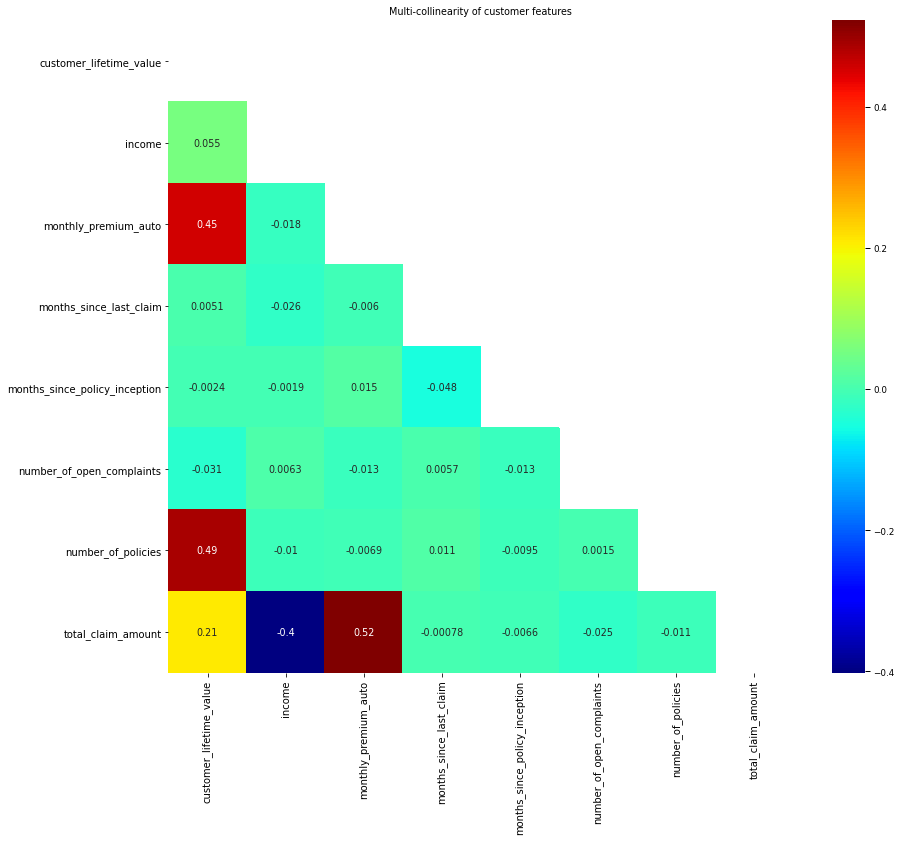

In [6]:
# Plot a correlation matrix to locate possible correlation right away

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()

## Categorical features

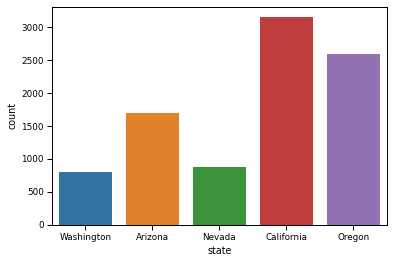

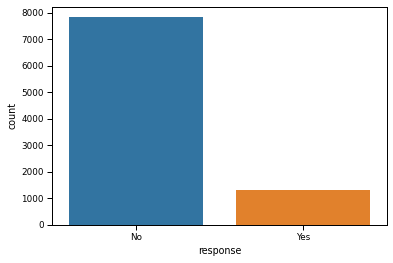

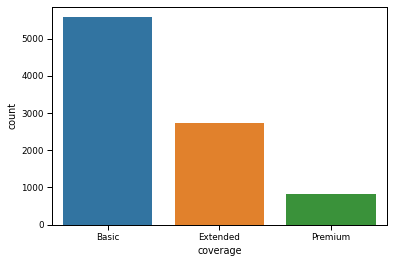

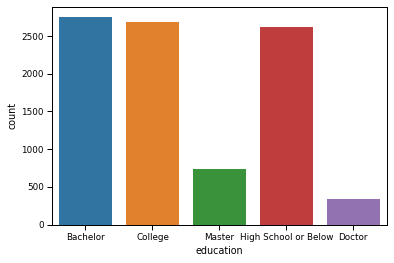

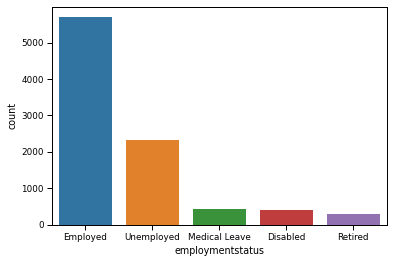

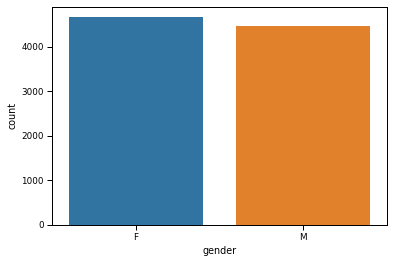

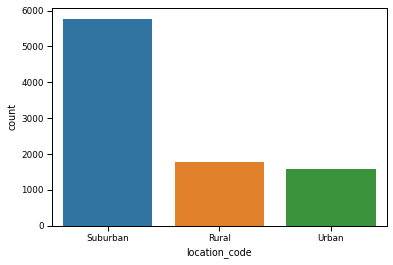

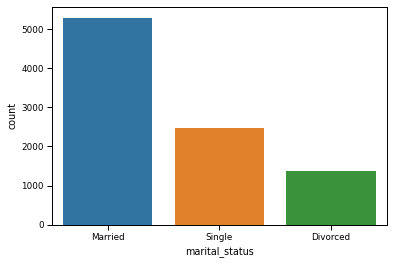

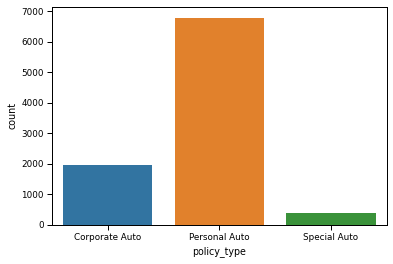

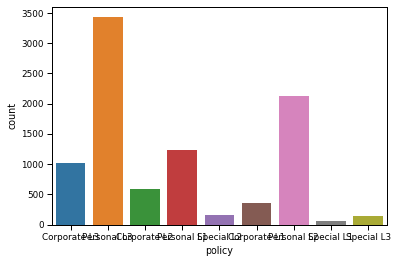

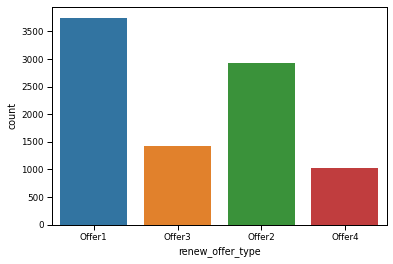

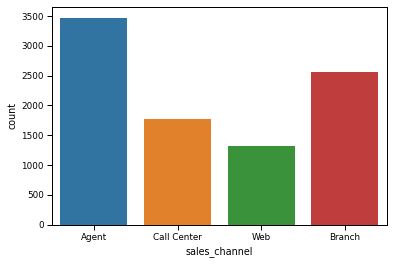

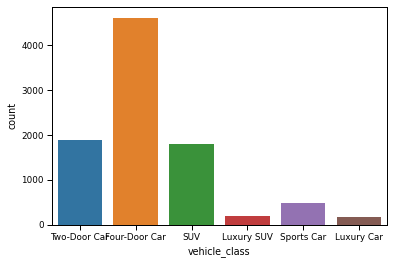

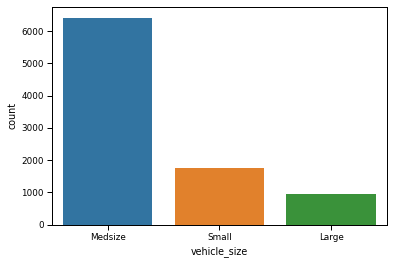

In [9]:
categoricals=df.select_dtypes(include=['object', 'datetime64']).drop(['customer','effective_to_date'], axis=1)
#NOTE: I am excluding the datetime objects

for col in categoricals.columns:
    sns.countplot(x=df[col])#, hue=df['response'])
    plt.show()

# Feature Engineering

## Normalization - BoxCox Transformation

In [10]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols} #it will first generate this dictionary
    for column in numeric_cols:
        #In this case, I need the confidence interval data
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) #boxcox does not work with negatives
        df[column] = df[column].fillna(df[column].mean()) #I fill the nan's with the mean
        transformed_data, ci = stats.boxcox(df[column]) 
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [11]:
df_for_BCTrans = df.copy() #It is important to do it this way with the .copy method.

df_trans, _ci = boxcox_transform(df_for_BCTrans)

## Remove Outliers

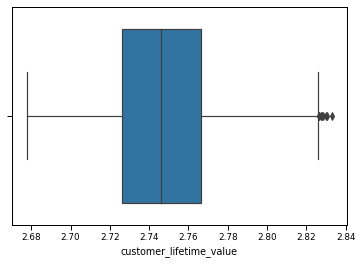

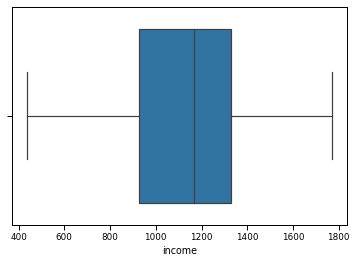

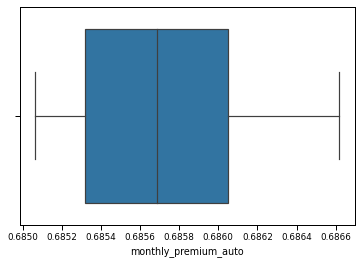

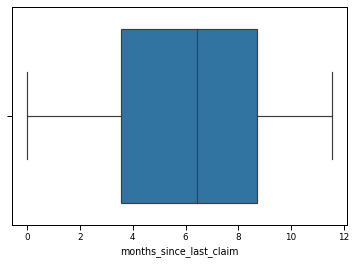

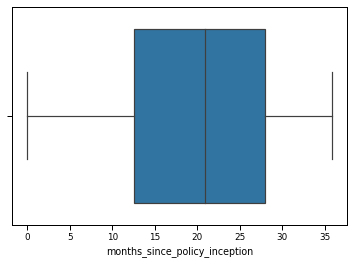

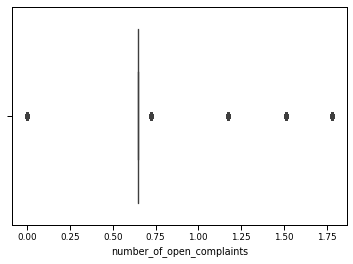

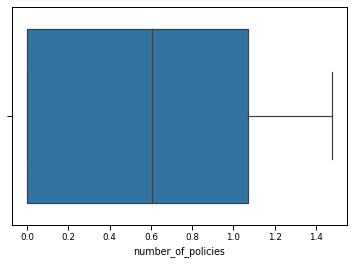

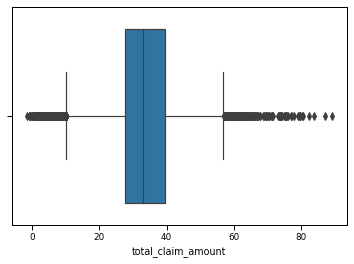

(9134, 24)

In [12]:
for col in df_trans.select_dtypes(include = np.number):
    sns.boxplot(x=df_trans[col])#, whis=10) # whis is the parameter to choose your threshold, standard is 1.5
    plt.show()
    
df_trans.shape

In [13]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

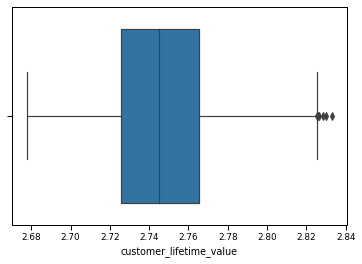

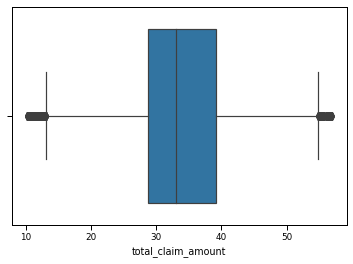

(8534, 24)

In [14]:
df_trans_outliers = df_trans.copy()

df_trans_outliers = remove_outliers(df_trans_outliers, threshold=1.5, in_columns=['total_claim_amount']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
sns.boxplot(x=df_trans_outliers['customer_lifetime_value'])
plt.show()
sns.boxplot(x=df_trans_outliers['total_claim_amount'])
plt.show()
df_trans_outliers.shape

In [15]:
df=df_trans_outliers

## X/y split

In [16]:
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)#np.number includes int and float
X_cat = X.select_dtypes(include = np.object).drop(['customer'], axis=1)

<ipython-input-16-0f2dcb1baa20>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object).drop(['customer'], axis=1)


## Encoding categorical values

In [17]:
# One Hot Encoding categorical variables
encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [18]:
# Concat DataFrames

column_names = list(X_num.columns) # get list of numerical column names
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names

X_numcat = np.concatenate([X_num, X_cat_encoded], axis=1)
X_ready = pd.DataFrame(data=X_numcat, index=X.index, columns=column_names)
X_ready.sample(5)

customer_lifetime_value       income  monthly_premium_auto  \
392                  2.772517  1167.961720              0.685925   
3795                 2.700883  1296.940762              0.685316   
1039                 2.724006  1053.751459              0.685925   
5367                 2.696952  1141.640558              0.685406   
2802                 2.800150   808.026143              0.685826   

      months_since_last_claim  months_since_policy_inception  \
392                  4.379465                      21.454469   
3795                 3.981540                       4.217280   
1039                 3.981540                      28.541156   
5367                 5.471294                      25.552871   
2802                 9.467765                      19.798936   

      number_of_open_complaints  number_of_policies  x0_California  x0_Nevada  \
392                    0.648045            0.607328            1.0        0.0   
3795                   0.648045            0.000000            0.0        0.0   
1039                   0.648045            0.000000            1.0        0.0   
5367                   1.779382            0.000000            0.0        0.0   
2802                   0.648045            0.607328            0.0        0.0   

      x0_Oregon  ...  x11_Branch  x11_Call Center  x11_Web  x12_Luxury Car  \
392         0.0  ...         0.0              0.0      0.0             0.0   
3795        1.0  ...         1.0              0.0      0.0             0.0   
1039        0.0  ...         0.0              0.0      0.0             0.0   
5367        0.0  ...         0.0              0.0      0.0             0.0   
2802        1.0  ...         1.0              0.0      0.0             0.0   

      x12_Luxury SUV  x12_SUV  x12_Sports Car  x12_Two-Door Car  x13_Medsize  \
392              0.0      0.0             0.0               0.0          0.0   
3795             0.0      0.0             0.0               0.0          1.0   
1039             0.0      0.0             0.0               0.0          1.0   
5367             0.0      0.0             0.0               0.0          1.0   
2802             0.0      0.0             0.0               0.0          0.0   

      x13_Small  
392         1.0  
3795        0.0  
1039        0.0  
5367        0.0  
2802        1.0  

[5 rows x 50 columns]

## Train-test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.3, random_state=42)

## Model fitting

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [21]:
predictions_norm = model.predict(X_test)
R2 = r2_score(y_test, predictions_norm)

from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions_norm, _ci['total_claim_amount'])

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions, squared=True)
RMSE = mean_squared_error(y_test, predictions, squared=False)

In [22]:
print('R2 =',R2, 'MAE =', MAE, 'MSE =', MSE, 'RMSE =', RMSE)

R2 = 0.8295799539292135 MAE = 387.8211089650025 MSE = 183016.9317741342 RMSE = 427.8047823179799


In [23]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results=results.sort_values('resid', ascending=False)

true        pred       resid
2035  1101.054320  481.364332  619.689988
2008  1138.255325  592.516345  545.738980
6813  1106.913309  572.181067  534.732242
7437  1134.960471  637.186971  497.773500
7102  1123.212014  629.259694  493.952320
...           ...         ...         ...
4935   333.696228  333.849255    0.153027
3044   457.593764  457.727880    0.134116
4485   459.785009  459.832529    0.047520
5342   558.835255  558.881125    0.045870
48     529.624084  529.625866    0.001782

[2561 rows x 3 columns]

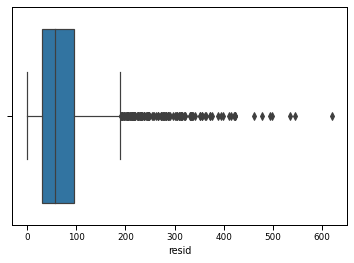

In [24]:
display(results)
sns.boxplot(x=results['resid'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

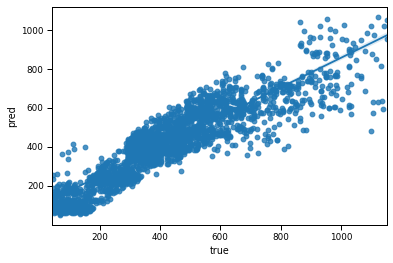

In [25]:
sns.regplot(results['true'], results['pred'])

# Improving the model

## Check multicollinearity with VIF

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature           VIF
0         customer_lifetime_value  15025.511098
1                          income     25.092253
2            monthly_premium_auto  14853.767023
4   months_since_policy_inception      5.484248
5       number_of_open_complaints      6.231231
18                    x4_Employed     18.637743
21                  x4_Unemployed      8.154130
23                    x6_Suburban      6.048135
25                     x7_Married      5.163262
48                    x13_Medsize      7.982537

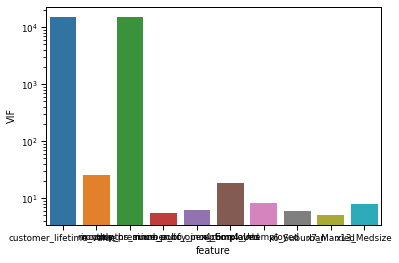

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_ready=pd.concat([y,X_ready],axis=1)
#df_ready

#Independent variables set
ind_var=X_ready

#VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = ind_var.columns

#calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(ind_var.values, i) for i in range(len(ind_var.columns))]

vif_data['VIF'].replace([np.inf, -np.inf], np.nan, inplace=True)

vif_data_filtered=vif_data[vif_data['VIF']>5]
display(vif_data_filtered)

sns.barplot(x=vif_data_filtered['feature'], y=vif_data_filtered['VIF']).set_yscale("log")
plt.show()

Decided to drop the two features with extremely high multicollinearity values: customer_lifetime_value and monthly_premium_auto. Then, try fitting the model again.

## Second model fitting

In [27]:
X_ready_2=X_ready.drop(['customer_lifetime_value', 'monthly_premium_auto'], axis=1)

In [28]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_ready_2, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train_2, y_train_2)

LinearRegression()

In [29]:
predictions_norm_2 = model.predict(X_test_2)
R2_2 = r2_score(y_test_2, predictions_norm_2)

from scipy.special import inv_boxcox

predictions_2 = inv_boxcox(predictions_norm_2, _ci['total_claim_amount'])

MAE_2 = mean_absolute_error(y_test_2, predictions_2)
MSE_2 = mean_squared_error(y_test_2, predictions_2, squared=True)
RMSE_2 = mean_squared_error(y_test_2, predictions_2, squared=False)

In [30]:
dict_ = {'parameter':['R2','MAE','MSE','RMSE'],'model_1': [R2,MAE,MSE,RMSE], 'model_2': [R2_2,MAE_2,MSE_2,RMSE_2]}
evaluation = pd.DataFrame(data=dict_)
evaluation

parameter        model_1        model_2
0        R2       0.829580       0.821790
1       MAE     387.821109     387.381171
2       MSE  183016.931774  182939.373939
3      RMSE     427.804782     427.714126

Eliminating those features with high multicolinearity did not have any significant effect on the metrics of the model.

true        pred       resid
2035  1101.054320  459.675191  641.379129
2008  1138.255325  567.576555  570.678770
6813  1106.913309  582.401509  524.511800
5365  1107.145019  601.173238  505.971781
7102  1123.212014  623.197801  500.014213
...           ...         ...         ...
8813    99.509191   99.692707    0.183516
4241   283.849464  283.744067    0.105397
3330   355.200000  355.288389    0.088389
580    238.005074  237.931855    0.073219
6881   555.457674  555.444881    0.012793

[2561 rows x 3 columns]

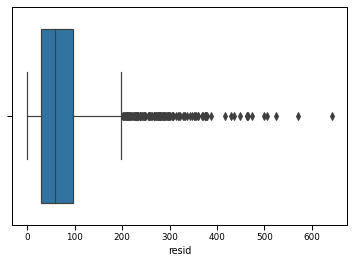

In [31]:
results_2 = pd.DataFrame()
results_2['true'] = inv_boxcox(y_test_2, _ci['total_claim_amount'])
results_2['pred'] = predictions_2
results_2['resid'] = results_2.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results_2=results_2.sort_values('resid', ascending=False)

display(results_2)
sns.boxplot(x=results_2['resid'])
plt.show()

# 3rd Model: MinMaxScaler Normalization

### Normalization

In [42]:
## VERY IMPORTANT: MinMaxScaler only works with numerical values.
## For the inversion of MinMaxScaler, the whole numerical df is necessary
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_to_scale=df.select_dtypes(include = np.number)
MinMax_array=scaler.fit_transform(df_to_scale)
df_MinMax=pd.DataFrame(data=MinMax_array, index=df.index, columns=df_to_scale.columns)
df_MinMax

customer_lifetime_value    income  monthly_premium_auto  \
0                    0.167033  0.608692              0.182563   
1                    0.497030  0.548600              0.519281   
2                    0.663983  0.530643              0.627667   
3                    0.524149  0.548600              0.614319   
4                    0.174501  0.476779              0.255738   
...                       ...       ...                   ...   
9129                 0.795739  0.759416              0.255738   
9130                 0.213478  0.195322              0.348706   
9131                 0.543125  0.548600              0.425823   
9132                 0.519450  0.200276              0.537159   
9133                 0.143300  0.548600              0.319689   

      months_since_last_claim  months_since_policy_inception  \
0                    0.942696                       0.084267   
1                    0.503437                       0.524397   
2                    0.636881                       0.485551   
3                    0.636881                       0.730478   
4                    0.474231                       0.543420   
...                       ...                            ...   
9129                 0.636881                       0.923960   
9130                 0.531690                       0.382806   
9131                 0.379595                       0.475660   
9132                 0.981143                       0.046571   
9133                 0.132312                       0.931670   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                      0.364197            0.000000            0.488860  
1                      0.364197            0.965338            0.989306  
2                      0.364197            0.411608            0.639841  
3                      0.364197            0.924066            0.611762  
4                      0.364197            0.000000            0.199698  
...                         ...                 ...                 ...  
9129                   0.364197            0.411608            0.286148  
9130                   0.364197            0.000000            0.483650  
9131                   0.660968            0.411608            0.794167  
9132                   0.364197            0.605547            0.728965  
9133                   0.364197            0.000000            0.474641  

[8534 rows x 8 columns]

### X/y split, numerical and categorical features

In [51]:
y_mms = df_MinMax['total_claim_amount']

X_num_mms = df_MinMax.select_dtypes(include = np.number).drop(['total_claim_amount'], axis=1)#np.number includes int and float
X_cat_mms = df.select_dtypes(include = np.object).drop(['customer'], axis=1)
display(y_mms.head(5))
display(X_num_mms.head(5))
display(X_cat_mms.head(5))

<ipython-input-51-6a79a78d58c8>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat_mms = df.select_dtypes(include = np.object).drop(['customer'], axis=1)


0    0.488860
1    0.989306
2    0.639841
3    0.611762
4    0.199698
Name: total_claim_amount, dtype: float64

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.167033  0.608692              0.182563   
1                 0.497030  0.548600              0.519281   
2                 0.663983  0.530643              0.627667   
3                 0.524149  0.548600              0.614319   
4                 0.174501  0.476779              0.255738   

   months_since_last_claim  months_since_policy_inception  \
0                 0.942696                       0.084267   
1                 0.503437                       0.524397   
2                 0.636881                       0.485551   
3                 0.636881                       0.730478   
4                 0.474231                       0.543420   

   number_of_open_complaints  number_of_policies  
0                   0.364197            0.000000  
1                   0.364197            0.965338  
2                   0.364197            0.411608  
3                   0.364197            0.924066  
4                   0.364197            0.000000

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [63]:
# One Hot Encoding categorical variables
encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded_mms = encoder.fit_transform(X_cat_mms).toarray()

column_names = list(X_num_mms.columns) # get list of numerical column names
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names

X_numcat_mms = np.concatenate([X_num_mms, X_cat_encoded_mms], axis=1)
X_ready_mms = pd.DataFrame(data=X_numcat_mms, index=X.index, columns=column_names)
X_ready_mms.sample(5)

customer_lifetime_value    income  monthly_premium_auto  \
2557                 0.430370  0.728961              0.220416   
8435                 0.263033  0.774969              0.470227   
8301                 0.506310  0.008328              0.585680   
8208                 0.520073  0.548600              0.162606   
2796                 0.124724  0.256378              0.051002   

      months_since_last_claim  months_since_policy_inception  \
2557                 0.942696                       0.304494   
8435                 0.073658                       0.025039   
8301                 0.443956                       0.393506   
8208                 0.777296                       0.524397   
2796                 0.685659                       0.465692   

      number_of_open_complaints  number_of_policies  x0_California  x0_Nevada  \
2557                   0.406592            1.000000            0.0        0.0   
8435                   0.364197            0.000000            0.0        0.0   
8301                   0.364197            0.725683            0.0        0.0   
8208                   0.364197            0.411608            1.0        0.0   
2796                   0.364197            0.000000            0.0        0.0   

      x0_Oregon  ...  x11_Branch  x11_Call Center  x11_Web  x12_Luxury Car  \
2557        0.0  ...         0.0              0.0      1.0             0.0   
8435        1.0  ...         0.0              0.0      0.0             0.0   
8301        1.0  ...         0.0              1.0      0.0             0.0   
8208        0.0  ...         1.0              0.0      0.0             0.0   
2796        1.0  ...         0.0              0.0      0.0             0.0   

      x12_Luxury SUV  x12_SUV  x12_Sports Car  x12_Two-Door Car  x13_Medsize  \
2557             0.0      0.0             0.0               0.0          1.0   
8435             0.0      0.0             0.0               0.0          1.0   
8301             0.0      1.0             0.0               0.0          1.0   
8208             0.0      0.0             0.0               1.0          0.0   
2796             0.0      0.0             0.0               0.0          1.0   

      x13_Small  
2557        0.0  
8435        0.0  
8301        0.0  
8208        1.0  
2796        0.0  

[5 rows x 50 columns]

### Train the model

In [57]:
X_train_mms, X_test_mms, y_train_mms, y_test_mms = train_test_split(X_ready_mms, y_mms, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train_mms, y_train_mms)

LinearRegression()

### Inverse normalization MinMax Scaler

In [68]:
X_test_no_cat=X_test.drop(list(encoder.get_feature_names()),axis=1)
X_test_no_cat.shape

(2561, 7)

In [74]:
predictions_norm_mms_ = model.predict(X_test_mms)
predictions_norm_mms=pd.DataFrame(data=predictions_norm_mms_,index=X_test_mms.index)

In [93]:
aux_df=pd.concat([X_test_no_cat,predictions_norm_mms],axis=1)
to_drop=X_test_no_cat.columns
predictions_mms_ = scaler.inverse_transform(aux_df)
aux_columns=aux_df.columns
aux_index=aux_df.index
predictions_mms=pd.DataFrame(data=predictions_mms_,index=aux_index,columns=aux_columns).drop(to_drop, axis=1)
predictions_mms

0
5637  15.150202
4049  30.707003
4309  33.007517
6909  40.354124
4948  41.458734
...         ...
312   15.392531
468   13.860316
831   25.284218
1203  36.060503
8401  36.815613

[2561 rows x 1 columns]

## Model evaluation and metrics

In [92]:
R2_mms = r2_score(y_test_mms, predictions_norm_mms)
MAE_mms = mean_absolute_error(y_test_mms, predictions_mms)
MSE_mms = mean_squared_error(y_test_mms, predictions_mms, squared=True)
RMSE_mms = mean_squared_error(y_test_mms, predictions_mms, squared=False)

dict_ = {'parameter':['R2','MAE','MSE','RMSE'],'model_BoxCox': [R2,MAE,MSE,RMSE], 'model_MinMaxScaler': [R2_mms,MAE_mms,MSE_mms,RMSE_mms]}
evaluation = pd.DataFrame(data=dict_)
evaluation

parameter   model_BoxCox  model_MinMaxScaler
0        R2       0.829580            0.829580
1       MAE     387.821109           32.940006
2       MSE  183016.931774         1155.538935
3      RMSE     427.804782           33.993219

true       pred        resid
2336  1152.000000  51.837737  1100.162263
3475  1152.000000  54.365005  1097.634995
2008  1138.255325  40.976152  1097.279173
7437  1134.960471  42.479700  1092.480771
3760  1142.400000  53.602307  1088.797693
...           ...        ...          ...
3283    44.730323  19.945129    24.785194
4591    43.084332  19.169433    23.914899
1682    45.049185  23.108593    21.940592
4153    46.949646  25.705737    21.243909
562     46.492039  26.812241    19.679798

[2561 rows x 3 columns]

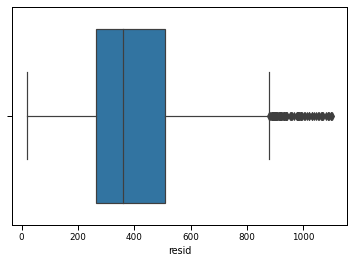

In [95]:
results_mms = pd.DataFrame()

aux_df_results=pd.concat([X_test_no_cat,y_test_mms],axis=1)
to_drop=X_test_no_cat.columns
inverse_mms_results_ = scaler.inverse_transform(aux_df_results)
aux_columns=aux_df_results.columns
aux_index=aux_df_results.index
y_test_inv_mms=pd.DataFrame(data=inverse_mms_results_,index=aux_index,columns=aux_columns).drop(to_drop, axis=1)

results_mms['true'] = inv_boxcox(y_test_2, _ci['total_claim_amount'])

results_mms['pred'] = predictions_mms
results_mms['resid'] = results_mms.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results_mms=results_mms.sort_values('resid', ascending=False)

display(results_mms)
sns.boxplot(x=results_mms['resid'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

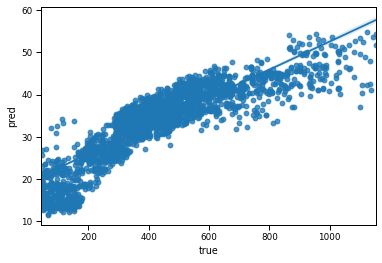

In [98]:
sns.regplot(results_mms['true'], results_mms['pred'])

#sns.regplot(results['true'], results['pred'])